In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.special import logsumexp
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.decomposition import PCA 
import sklearn.metrics as metric

C:\Users\bhara\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
MAX_ITER = 100

In [3]:
df = pd.read_table("sonar.all-data", delimiter=",", header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df2 = df.iloc[: , -1:]
df2

,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [6]:
df = df.drop(columns = df.columns[-1])
df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [7]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.456232,-0.116681,-0.705146,-0.779738,-0.647842,0.990954,1.314965,0.407323,0.463980,0.448504,...,0.353205,-0.189390,-0.129077,1.230104,-0.847228,0.328253,-0.228741,0.550172,1.841992,1.831621
204,0.136733,-0.861801,-0.366036,0.054026,0.014392,-0.148740,-0.369029,-0.388465,-0.635067,0.053253,...,-0.915619,-0.761663,-0.200066,0.351373,-0.422934,-0.335815,-0.765856,-0.735798,-0.282388,0.038412
205,1.004381,0.160078,-0.673843,-0.531979,-0.723629,0.212502,0.064137,-0.200113,-0.442014,0.332912,...,-0.047477,0.268428,-1.108725,-0.801960,-0.437077,0.118548,1.070732,0.906526,-0.039138,-0.678871
206,0.049533,-0.095392,0.134804,0.148821,-1.055648,0.522865,0.401585,-0.264859,0.139685,0.202404,...,-0.990747,-0.501539,-0.867363,0.227802,-0.804798,-0.825128,-0.765856,-0.007598,-0.704020,-0.340154


In [8]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_features_df)
pca_data

array([[ 1.92116817, -1.37089312],
       [-0.48012458,  7.58638801],
       [ 3.8592282 ,  6.43986016],
       [ 4.59741943, -3.10408888],
       [-0.53386761,  1.84984701],
       [-1.24701593,  3.78548414],
       [ 1.87007312,  2.49551038],
       [-2.05769816,  2.3147504 ],
       [-1.64556277,  0.25372155],
       [-4.28065736, -2.42781795],
       [-1.46164351, -6.32305562],
       [-2.46394888, -1.2537634 ],
       [-3.99546982,  1.64506244],
       [ 0.6370814 , -0.63741683],
       [-0.10539302, -0.25210417],
       [ 2.11242307,  0.59393523],
       [ 4.39574903, -2.25749069],
       [ 1.43859617,  1.90219042],
       [-1.03943408, -3.29436397],
       [-1.16485881,  8.59655069],
       [ 2.64812566,  1.66803742],
       [ 6.23535677, -1.47389049],
       [11.23389579, -2.75609298],
       [-0.24732176, -4.86351661],
       [ 2.65154822, -4.39934635],
       [-0.42203896, -7.16826626],
       [-3.69919995,  2.49392786],
       [-2.90589296,  0.16356259],
       [-1.8957691 ,

In [9]:
label_encoder = preprocessing.LabelEncoder()
df2 = label_encoder.fit_transform(df2)
df2

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
model1 = GaussianMixture(n_components=2, init_params='random_from_data', max_iter=MAX_ITER, random_state=42)
model1.fit(df)
yhat1 = model1.predict(df)


In [11]:
err1 = df2 - yhat1
abs_sum_err1 = sum(abs(err1))
abs_sum_err1 = min(abs_sum_err1, (len(df2)-abs_sum_err1))
abs_sum_err1
acc1 = abs( len(df2)- abs_sum_err1 )/len(df2)
acc1

print('Normal:-')
print('silhouette_score:        ', metric.silhouette_score(df, yhat1))
print('davies_bouldin_score:    ', metric.davies_bouldin_score(df, yhat1))
print('calinski_harabasz_score: ', metric.calinski_harabasz_score(df, yhat1))
print('Classification accuracy: ', acc1)

Normal:-
silhouette_score:         0.15366296128872522
davies_bouldin_score:     1.9757588081577413
calinski_harabasz_score:  30.287528425902405
Classification accuracy:  0.5144230769230769


In [12]:
model2 = GaussianMixture(n_components=2, init_params='random_from_data', max_iter=MAX_ITER, random_state=42)
model2.fit(scaled_features_df)
yhat2 = model2.predict(scaled_features_df)




In [13]:
err2 = df2 - yhat2
abs_sum_err2 = sum(abs(err2))
abs_sum_err2 = min(abs_sum_err2, (len(df2)-abs_sum_err2))
abs_sum_err2
acc2 = abs( len(df2)- abs_sum_err2 )/len(df2)
acc2

print('Scaled:-')
print('silhouette_score:        ', metric.silhouette_score(scaled_features_df, yhat2))
print('davies_bouldin_score:    ', metric.davies_bouldin_score(scaled_features_df, yhat2))
print('calinski_harabasz_score: ', metric.calinski_harabasz_score(scaled_features_df, yhat2))
print('Classification accuracy: ', acc2)

Scaled:-
silhouette_score:         0.1753277453667591
davies_bouldin_score:     2.1464501204129576
calinski_harabasz_score:  23.127960337240218
Classification accuracy:  0.5480769230769231


In [14]:
model3 = GaussianMixture(n_components=2, init_params='random_from_data', max_iter=MAX_ITER, random_state=42)
model3.fit(pca_data)
yhat3 = model3.predict(pca_data)


In [15]:
err3 = df2 - yhat3
abs_sum_err3 = sum(abs(err3))
abs_sum_err3 = min(abs_sum_err3, (len(df2)-abs_sum_err3))
abs_sum_err3
acc3 = abs( len(df2)- abs_sum_err3 )/len(df2)
acc3

print('PCA:-')
print('silhouette_score:        ', metric.silhouette_score(pca_data, yhat2))
print('davies_bouldin_score:    ', metric.davies_bouldin_score(pca_data, yhat2))
print('calinski_harabasz_score: ', metric.calinski_harabasz_score(pca_data, yhat2))
print('Classification accuracy: ', acc3)

PCA:-
silhouette_score:         0.2997257911411429
davies_bouldin_score:     1.189989976821357
calinski_harabasz_score:  56.97312328709753
Classification accuracy:  0.5432692307692307


In [16]:
pca_df = pd.DataFrame(pca_data)
pca_df['predicted_clusters'] = yhat3

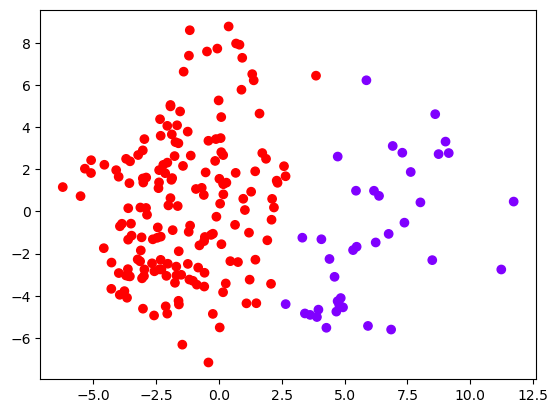

In [17]:
plt.scatter(pca_df[0], pca_df[1], c=pca_df['predicted_clusters'], cmap='rainbow')